In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [2]:
data_set=pd.read_csv('gld_price_data.csv')

In [10]:
data_set.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


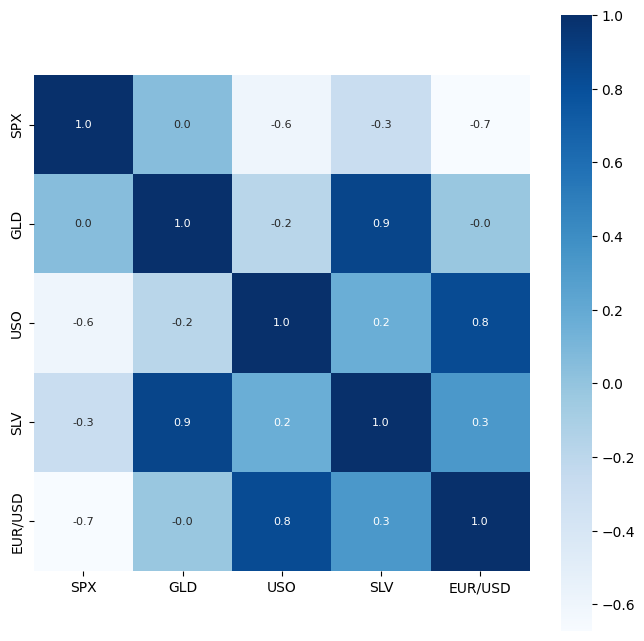

In [13]:
correlat = data_set.corr(numeric_only=True)
plt.figure(figsize=(8,8))
sns.heatmap(correlat, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()


In [14]:
print(correlat['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\hpriy\AppData\Local\Temp\ipykernel_40996\3825007250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_set['GLD'],color='blue')


<Axes: xlabel='GLD', ylabel='Density'>

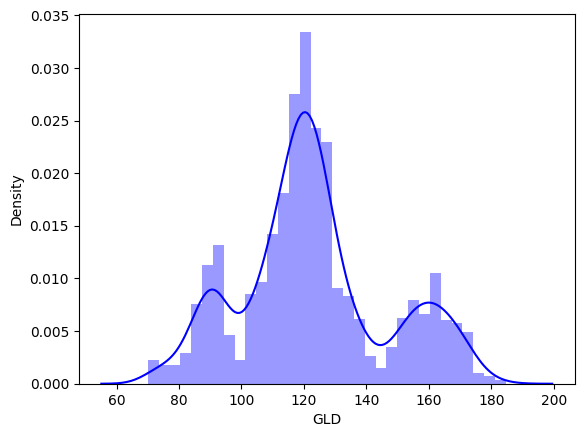

In [15]:
sns.distplot(data_set['GLD'],color='blue')

In [16]:
X=data_set.drop(['Date','GLD'],axis=1)
Y=data_set['GLD']

In [17]:
data_set.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [18]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
regressor=RandomForestRegressor()

In [21]:
regressor.fit(X_train,Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
test_data_prediction=regressor.predict(X_test)
print(test_data_prediction)

[168.51729955  81.9386     116.11889992 127.47730073 120.87270117
 154.82469755 149.96199809 126.22940005 117.70829848 125.94950055
 116.53160117 171.9297011  141.66349886 167.76959824 115.29220023
 117.47260022 138.1825029  170.21520129 159.55800371 157.73979969
 155.09770026 124.92030006 175.82879971 157.18190399 125.3239005
  93.83339955  78.16389976 120.33810044 119.11439931 167.51619905
  88.30720058 125.40380012  91.15150107 117.64550012 121.17589913
 136.27160102 115.3935014  115.26300076 146.16549972 106.98500102
 104.02030239  87.24849795 126.57840022 118.00860036 152.27299863
 119.63499977 108.26100017 108.17199853  93.1326005  127.17759767
  74.84290047 113.5666994  121.44159983 111.27149906 118.83849894
 120.67279934 158.2776002  168.3149008  146.83409649  85.82239883
  94.23650008  86.77979915  90.38910018 119.0310009  126.43080052
 127.40110043 168.73300053 122.28679927 117.35289906  98.27740017
 168.17780149 142.837598   131.78620259 121.1064022  120.95589905
 119.928000

In [23]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9895608992007349


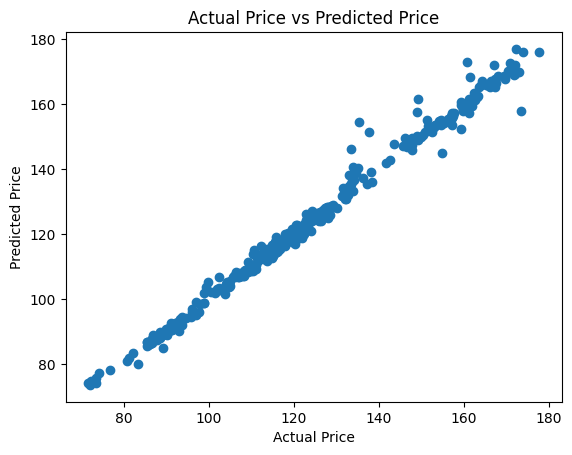

In [24]:
#compare the actual values and predicted values in a plot
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

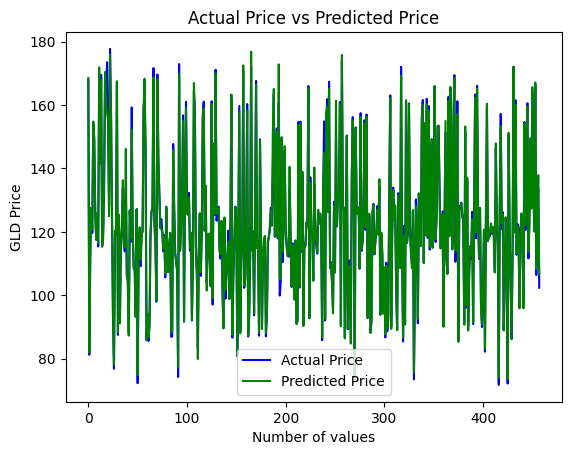

In [28]:
Y_test=list(Y_test)
plt.plot(Y_test,color='blue',label='Actual Price')
plt.plot(test_data_prediction,color='green',label='Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.title('Actual Price vs Predicted Price')
plt.legend()
plt.show()